The objective of this project is indicated in the website:  
"Egis contribue à l’exploitation du contrôle du stationnement sur voirie pour plusieurs villes, en France et à l’international.
Des véhicules équipés de caméras prennent des photos des véhicules stationnés.
Puis, à partir du numéro de la plaque, de la géolocalisation et de l’horodatage, un processus est initié pour contrôler la validité du stationnement et aller jusqu’à l’émission d’un forfait post stationnement si nécessaire. 
Nous sommes convaincus que l’analyse de ces données permettrait d’optimiser l’activité d’exploitation d’une part et permettrait de réduire le taux d’infraction constaté.
Nous suggérons donc de mettre au point un modèle de Machine Learning dans le but d’Identifier les zones / horaires où il y a le plus d’infractions et optimiser les trajets des véhicules de contrôle du stationnement en conséquence."

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

In [4]:
# Split datasets into features (X) and target (y)
X_train = pd.read_csv('x_train_final_asAbTs5.csv', sep=',', header=0, encoding='utf-8') # (4861236, 11)
y_train = pd.read_csv('y_train_final_YYyFil7.csv', sep=',', header=0, encoding='utf-8') # (2028750, 11)
X_test = pd.read_csv('x_test_final_fIrnA7Q.csv', sep=',', header=0, encoding='utf-8') # (4861236, 2)

# Handling of Na values
In the X Train data, there are Na values to handle in the "HauteurNeige" and "ForceVent" variables.
In the Y test data, there are Na values in the HauteurNeige variables.

In [49]:
print("X train data\n", X_train.isnull().sum()) # Check for missing values in X_train. HauteurNeige contains 1314641 missing values while ForceVent contains 4888 missing values.
print("X test data\n", X_test.isnull().sum()) # Check for missing values in X_test. HauteurNeige contains 7906 missing values.
print("Y train data\n", y_train.isnull().sum())


X train data
 Unnamed: 0               0
total_count              0
longitude_scaled         0
latitude_scaled          0
Precipitations           0
HauteurNeige        131461
Temperature              0
ForceVent             4888
day_of_week              0
month_of_year            0
hour                     0
dtype: int64
X test data
 Unnamed: 0             0
total_count            0
longitude_scaled       0
latitude_scaled        0
Precipitations         0
HauteurNeige        7906
Temperature            0
ForceVent              0
day_of_week            0
month_of_year          0
hour                   0
dtype: int64
Y train data
 Unnamed: 0       0
invalid_ratio    0
dtype: int64


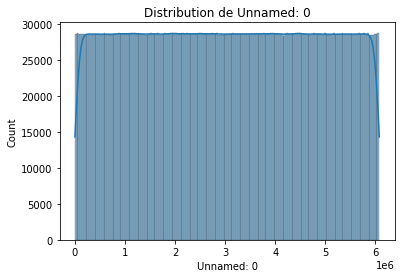

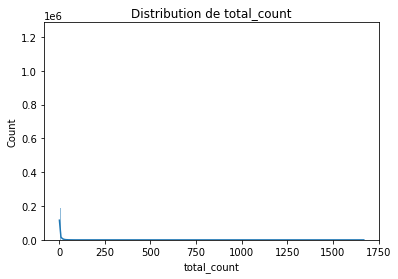

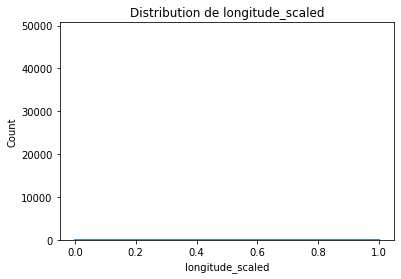

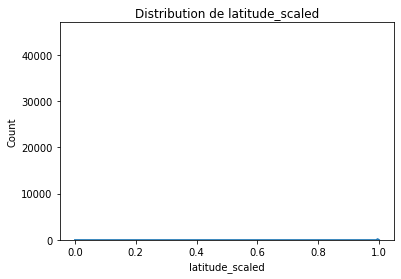

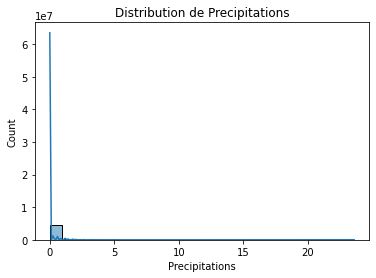

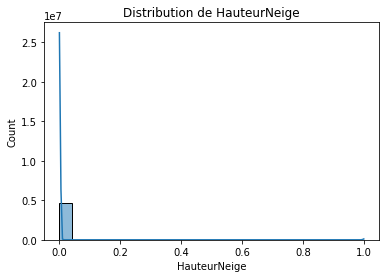

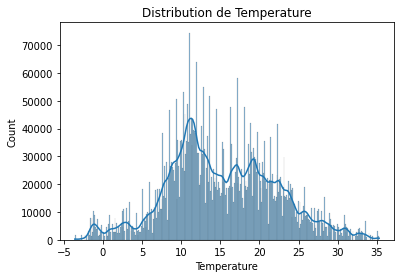

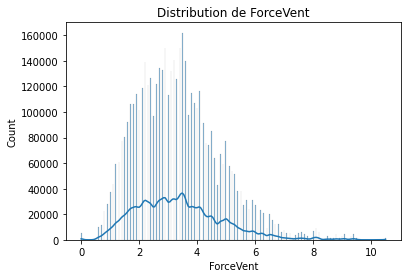

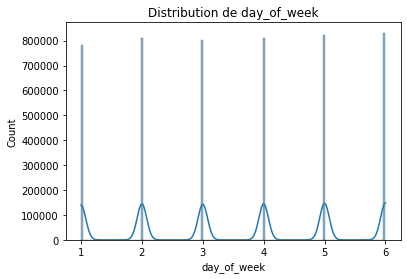

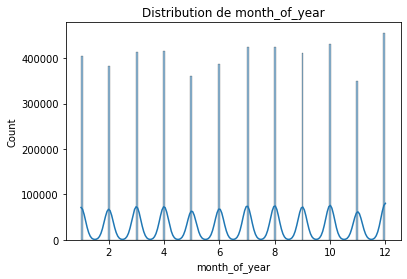

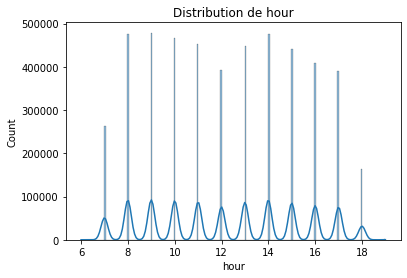

In [ ]:
%%script python -c "pass"
import matplotlib.pyplot as plt
import seaborn as sns

for col in X_train.select_dtypes(include='number').columns:
    plt.figure()
    sns.histplot(X_train[col].dropna(), kde=True)
    plt.title(f'Distribution de {col}')


for col in X_train.select_dtypes(include='object').columns:
    plt.figure()
    X_train[col].value_counts().plot(kind='bar')
    plt.title(f'Valeurs de {col}')


In [5]:
X_train["hour_sin"] = np.sin(2 * np.pi * X_train["hour"] / 24)
X_train["hour_cos"] = np.cos(2 * np.pi * X_train["hour"] / 24)
X_train["is_weekend"] = X_train["day_of_week"] >= 5

X_test["hour_sin"] = np.sin(2 * np.pi * X_test["hour"] / 24)
X_test["hour_cos"] = np.cos(2 * np.pi * X_test["hour"] / 24)
X_test["is_weekend"] = X_test["day_of_week"] >= 5

In [16]:
from sklearn.cluster import KMeans

# X = X_test[["latitude_scaled", "longitude_scaled"]]
# kmeans = KMeans(n_clusters=5)
# X_test["geo_cluster"] = kmeans.fit_predict(X)

X_tr = X_train[["latitude_scaled", "longitude_scaled"]]
kmeans = KMeans(n_clusters=5)
X_train["geo_cluster"] = kmeans.fit_predict(X_tr)


In [18]:
X_train

,Unnamed: 0,total_count,longitude_scaled,latitude_scaled,Precipitations,HauteurNeige,Temperature,ForceVent,day_of_week,month_of_year,hour,hour_sin,hour_cos,is_weekend,geo_cluster
0,0,1,0.998417,0.996118,0.0,0.0,14.6,2.5,3,4,8,8.660254e-01,-5.000000e-01,False,3
1,1,35,0.999222,0.996000,0.0,0.0,22.4,3.1,5,3,13,-2.588190e-01,-9.659258e-01,True,0
2,2,3,0.998371,0.996309,1.8,0.0,11.7,3.3,4,10,8,8.660254e-01,-5.000000e-01,False,3
3,3,1,0.998804,0.996343,0.0,0.0,28.6,2.6,4,2,16,-8.660254e-01,-5.000000e-01,False,4
4,4,2,0.999126,0.996417,0.0,0.0,9.6,3.2,3,9,18,-1.000000e+00,-1.836970e-16,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076541,6076541,9,0.998397,0.996100,0.0,0.0,-0.3,2.3,5,7,18,-1.000000e+00,-1.836970e-16,True,3
6076542,6076542,55,0.998655,0.996093,0.0,0.0,17.0,6.0,6,12,10,5.000000e-01,-8.660254e-01,True,3
6076543,6076543,9,0.999200,0.996001,0.0,0.0,11.5,5.1,3,5,12,1.224647e-16,-1.000000e+00,False,0
6076544,6076544,14,0.998374,0.996076,0.0,0.0,13.6,3.5,4,11,7,9.659258e-01,-2.588190e-01,False,3


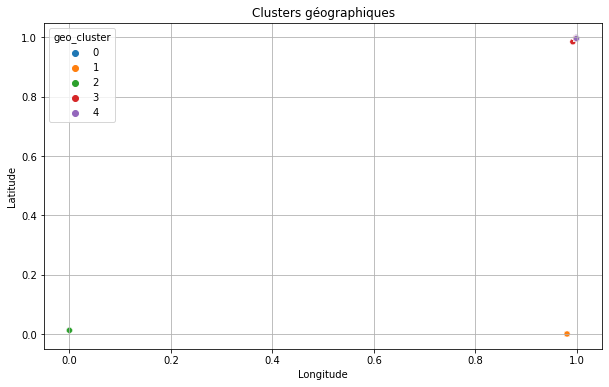

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x="longitude_scaled", y="latitude_scaled", hue="geo_cluster", palette="tab10")
plt.title("Clusters géographiques")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = X_train[["latitude_scaled", "longitude_scaled"]]  # ou d'autres colonnes géo
inertias = []
K_range = range(2, 6)  # à adapter selon tes données

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Tracer la courbe
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Méthode du coude (Elbow Method)")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (somme des distances intra-cluster)")
plt.grid(True)
plt.show()


In [ ]:
# Handle missing or invalid values
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure alignment between X_train and y_train after dropping rows
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

In [ ]:
# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# Train RandomForest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train.values)  # Flatten y_train if it's a single column

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate using Spearman correlation
# Assuming you have the actual target values for the test set (y_test)
# Replace 'y_test_actual.csv' with the actual file containing test set targets
y_test = pd.read_csv('y_test_actual.csv', sep=',', header=0, encoding='utf-8')
y_test = y_test.replace([np.inf, -np.inf], np.nan).dropna()


In [ ]:
# Ensure alignment between y_test and y_pred
y_test = y_test.iloc[:len(y_pred)]
spearman_corr, _ = spearmanr(y_test.values, y_pred)

print(f"Spearman Correlation: {spearman_corr}")
